# Regression in Python

***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [5]:
#special IPython command to prepare the notebook for matplotlib and other libraries

%matplotlib inline 
#makes sure you dont have to say plt.show() in a notebook

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
colors_duke2 = ["#66c2a4","#41ae76", "#99d8c9"]
sns.set_palette(palette=colors_duke2) #setting default color

#Setting font sizes
# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)

#Setting a default fig size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size


In [6]:
#FORMULAS

# line of best fit function
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

#Generate a scatter plot with line of best fit for two variables:

def gen_scatter(x_name, y_name, name_of_independent_var= None):
    plt.figure(figsize=(9,7))
    plt.scatter(x_name, y_name, color= "#3690c0", alpha=.6)
    a, b = best_fit(x_name, y_name)
    
    # line of best fit 
    yfit = [(a + b * i) for i in x_name]
    plt.plot(x_name, yfit, color= "#fc4e2a" )
    plt.xlabel(name_of_independent_var)
    plt.ylabel("Housing Price")
    plt.title(f"Relationship between {name_of_independent_var} and Price")
    plt.show()

***
# Part 1: Linear Regression: Loading Data & Compiling Data

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [7]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [8]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [9]:
boston.data.shape

(506, 13)

In [10]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [12]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [13]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [14]:
print(boston.target.shape)

(506,)


In [15]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


***
# Part 2: EDA of Features

### Exploring Correlations
***


Take a peak at the different relationships with the variables:

In [17]:
#Looking at the correlation between all the variables:
print (bos.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

Text(0.5, 1.0, 'Heat Map between Variables Boston Housing')

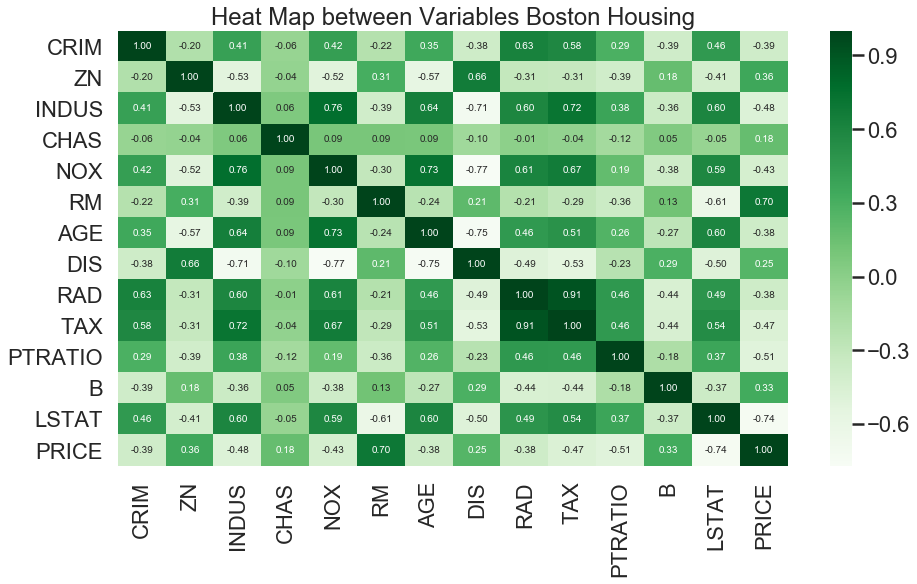

In [18]:
#Heat map of the correlation chart above:
corr = bos.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='Greens',annot=True, fmt='.2f', annot_kws={"size": 10})   
plt.title('Heat Map between Variables Boston Housing')

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


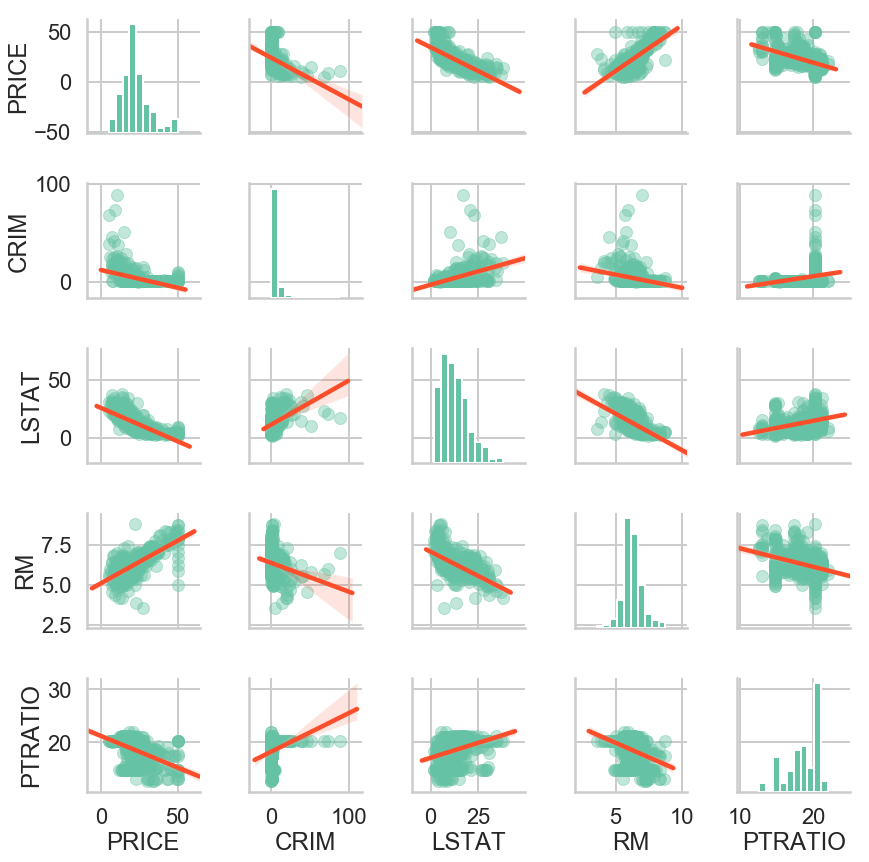

<Figure size 1440x720 with 0 Axes>

In [19]:
#Take a peak at the relationship between the variables
sns.pairplot(bos, vars=["PRICE", "CRIM", "LSTAT", "RM", "PTRATIO"], kind="reg", plot_kws={'line_kws':{'color':'#fc4e2a'}, 'scatter_kws': {'alpha': 0.4}})
plt.figure(figsize=(20,10))
plt.tight_layout()

### Scatterplots
***
Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

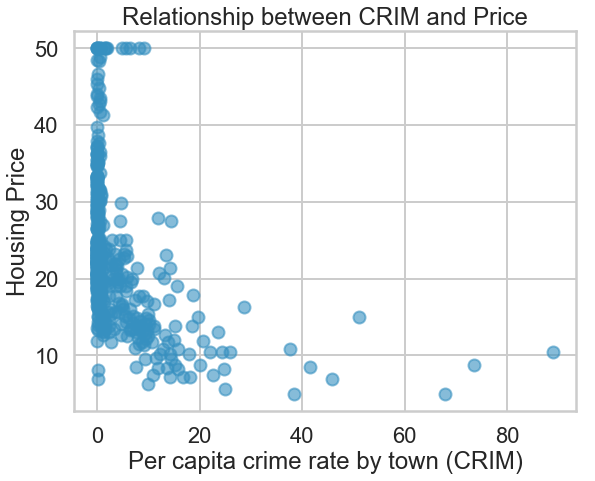

In [20]:
#First looks at the relationship
plt.scatter(bos.CRIM, bos.PRICE, alpha = .6, color= "#3690c0")
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

*See how all the points are scrunched up to the side of the graph, this plot could use the help of a logarithmic scale to see the true relationship, as well as a line of best fit*

best fit line:
y = 21.02 + -1.93x


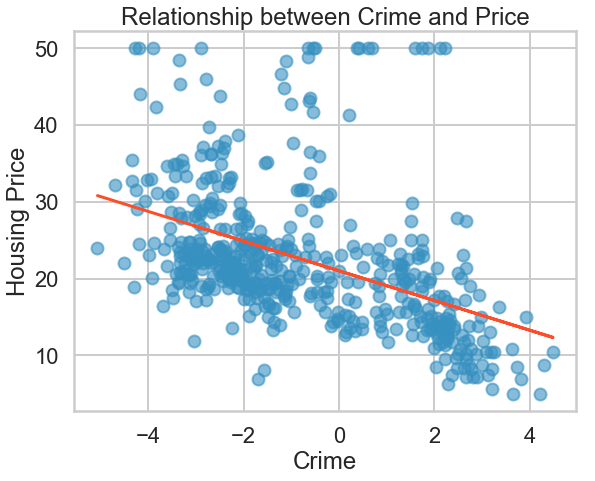

In [21]:
#This graph could benefit from using a logarithmic scale & line of best fit
gen_scatter(np.log(bos.CRIM),bos.PRICE, "Crime")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

#### Describe the relationship CRIME and PRICE

The relationship between Crime and price makes sense because the higher the housing price, the less crime associated with it. In particular there seems to be a a good number of housing prices that have zero crime which is skewing the graph. However there is a very slight negative correlation (-.38) that a lower house price will have slightly more crime.


#### Relationship between *ROOM* and *PRICE*
Not surprisingly, room and price have a very strong positive correlation with the more rooms, the higher the house price

best fit line:
y = -34.67 + 9.10x


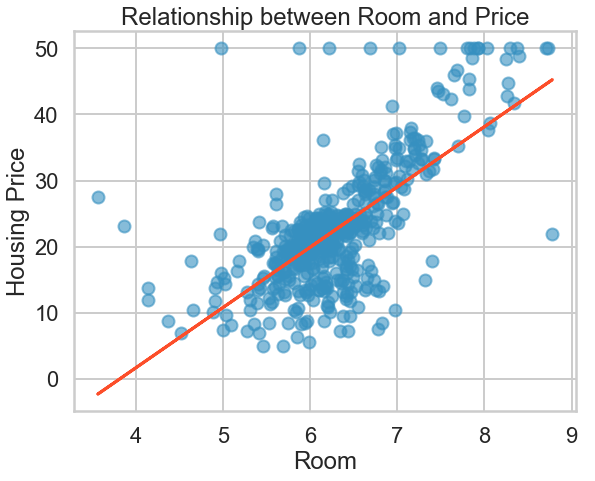

In [22]:
#Room
gen_scatter(bos.RM, bos.PRICE, "Room")

#### Relationship between *PTRATIO* and *PRICE*

The shape of this correlation is not very distinct (around .5) so its really a 50% ability to predict the value of a home from the student to teacher ratio. However, it is a very interesting stat to investigate


best fit line:
y = 62.34 + -2.16x


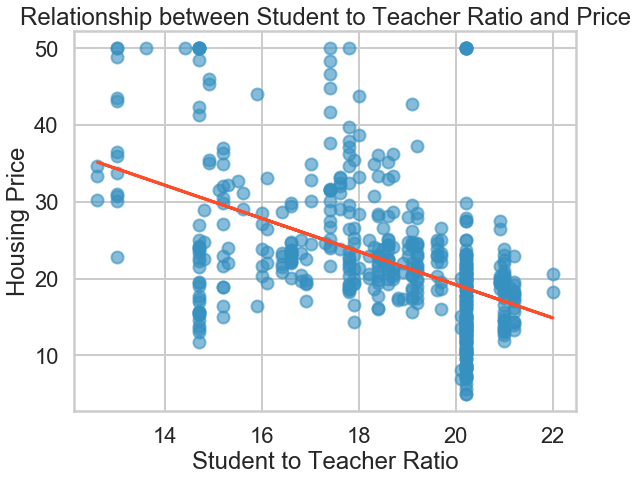

In [23]:
#This is what a 50% correlation looks like
gen_scatter(bos.PTRATIO, bos.PRICE, "Student to Teacher Ratio")

#### Relationship between LSTAT and Price
*It makes sense that the percentage of lower income individuals in the area would be higher for lower priced homes.* 

This displays a negative correlation

best fit line:
y = 34.55 + -0.95x


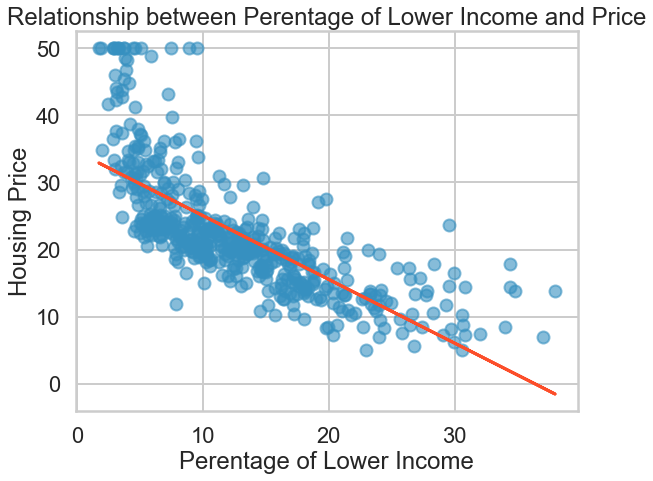

In [24]:
gen_scatter(bos.LSTAT, bos.PRICE, "Perentage of Lower Income")

#### Let's look at what a very low correlation (.25) looks like:

best fit line:
y = 18.39 + 1.09x


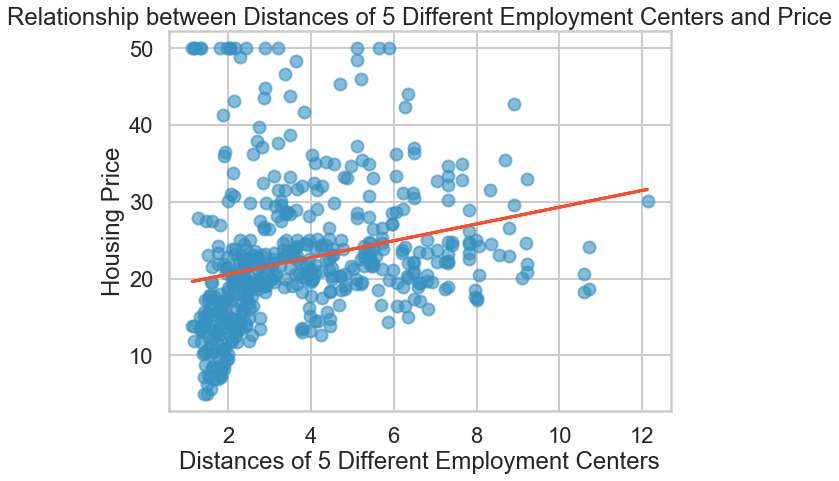

In [25]:
#What a super low correlation looks like:
gen_scatter(bos.DIS, bos.PRICE, "Distances of 5 Different Employment Centers")

### Scatterplots using Seaborn
***

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


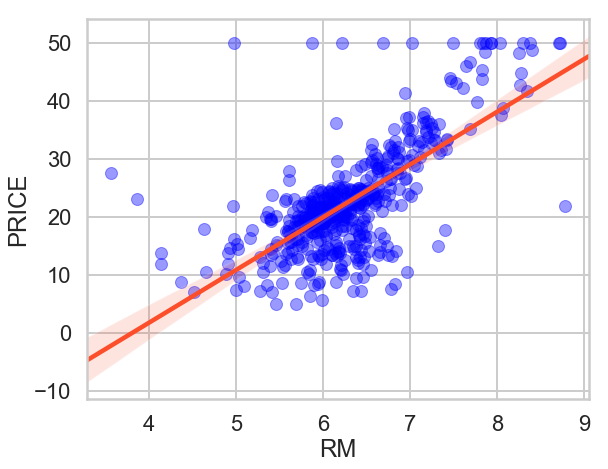

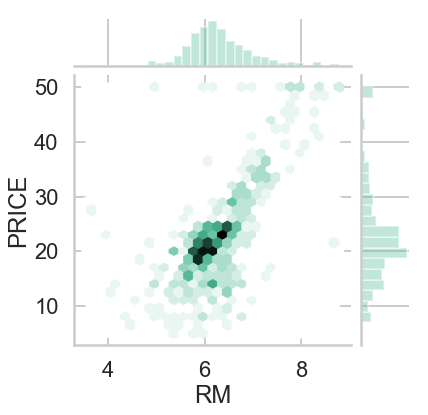

In [26]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, color= "b", line_kws={'color':'#fc4e2a'}, scatter_kws= {'alpha': 0.4})
sns.jointplot(y="PRICE", x="RM", data=bos, kind= "hex")

### Histograms
***


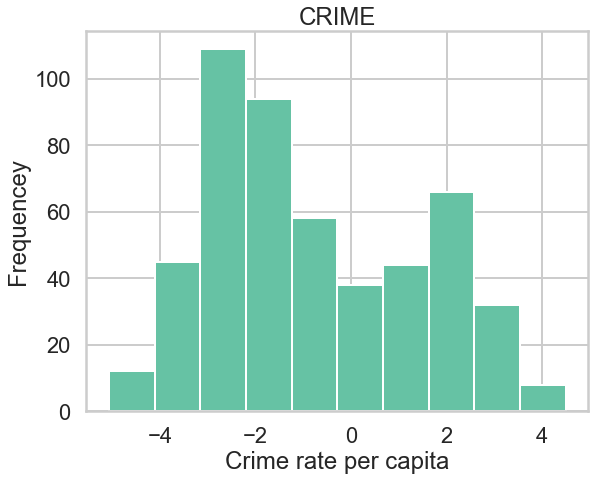

In [27]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIME")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

#### Log versus non-logarithmic & Checking for collinearity:

1. *Below you can see the histograms and the difference without using a log. It is crucial to use the log values when there are a lot of small values or a lot of large values that are difficult to see in a linear scale. Logarithmic values, since they grow exponentially, will show more detail in any extreme value nuances. Whereas, a linear  scale will bunch the values together.*

2. *The Histograms below are not as helpful to see the correlation between variables as the heatmap above.* It is important to avoid collinearity in your feature variables so they will not skew the linear coefficients, and the accuracy of your model. Below the histograms are a couple scatter plots comparing the room feature against some of the other top contenders.

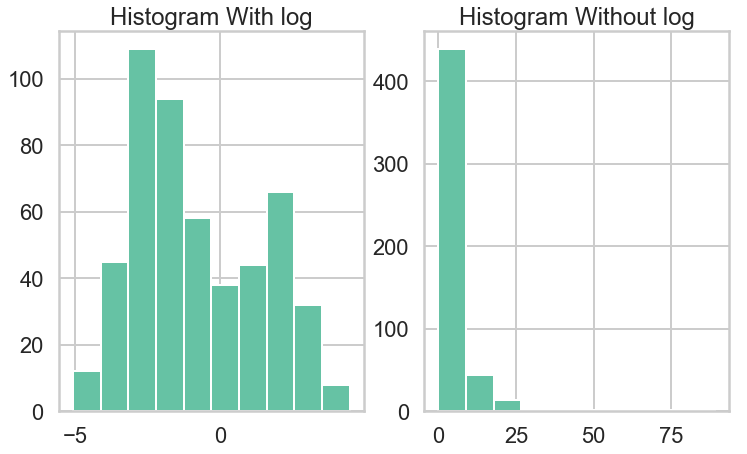

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))
ax1.hist(np.log(bos.CRIM))
ax1.set_title('Histogram With log')
ax2.hist(bos.CRIM)
ax2.set_title('Histogram Without log')
plt.show()
#It needs logs because the data is so skewed

*This shows that there is a higher number of low crime areas and it starts to fall from there.*

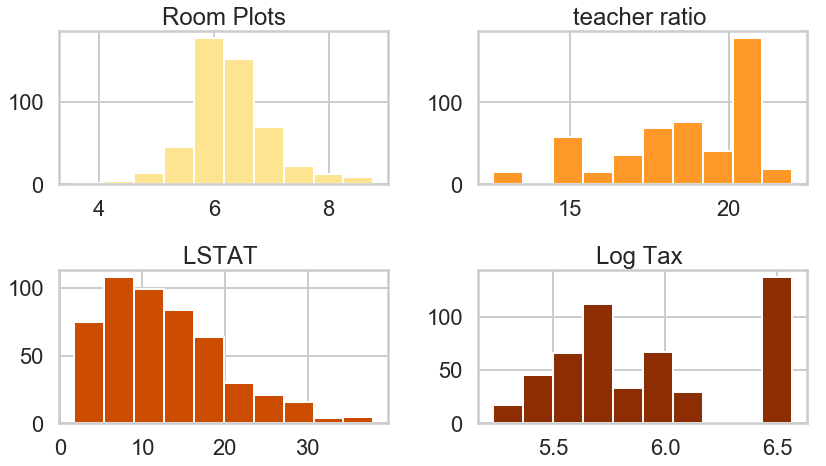

In [29]:
#Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,7))
ax1.hist(bos.RM, color= "#fee391")
ax1.set_title('Room Plots')
ax2.hist(bos.PTRATIO, color= "#fe9929")
ax2.set_title('teacher ratio ')
ax3.hist(bos.LSTAT, color= "#cc4c02")
ax3.set_title('LSTAT ')
ax4.hist(np.log(bos.TAX), color= "#8c2d04")
ax4.set_title('Log Tax ')
plt.tight_layout()

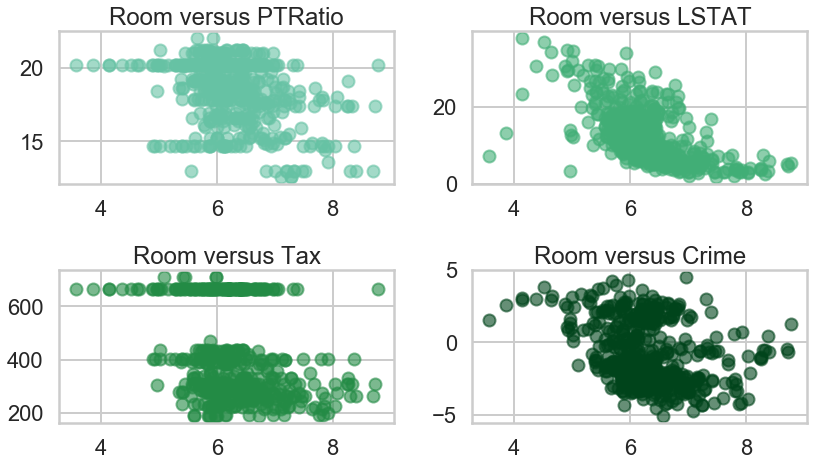

In [30]:
#Here are some scatter plots to display the relationships with the room variable (the best predictor of housing cost)
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,7))
ax1.scatter(bos.RM, bos.PTRATIO, alpha = .6, c= "#66c2a4")
ax1.set_title('Room versus PTRatio')
ax2.scatter(bos.RM, bos.LSTAT, alpha= .6, c= "#41ae76")
ax2.set_title('Room versus LSTAT')
ax3.scatter(bos.RM, bos.TAX, alpha = .6, c= "#238b45")
ax3.set_title('Room versus Tax')
ax4.scatter(bos.RM, np.log(bos.CRIM), alpha = .6, c= "#00441b")
ax4.set_title('Room versus Crime')
plt.tight_layout()

## Part 3: Linear Regression with statsmodels
***

### `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [31]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [32]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        19:45:06   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

#### Insights: Accuracy of statsmodels predictions
Below, the black dashed line represents what a perfect prediction would look like. It looks like houses in the 180k- 300k range were producing the most accurate predictions (this is the green shaded area). Although, it should be noted that this area also contains three of the worst outliers (Points highlighted in red). Two of which predicted the prices would be near or BELOW zero dollars for sale! The lower housing prices (below 180k)  seem to be OVER estimating and higher priced houses (above 300k) seem to be consistently underestimating the prices.

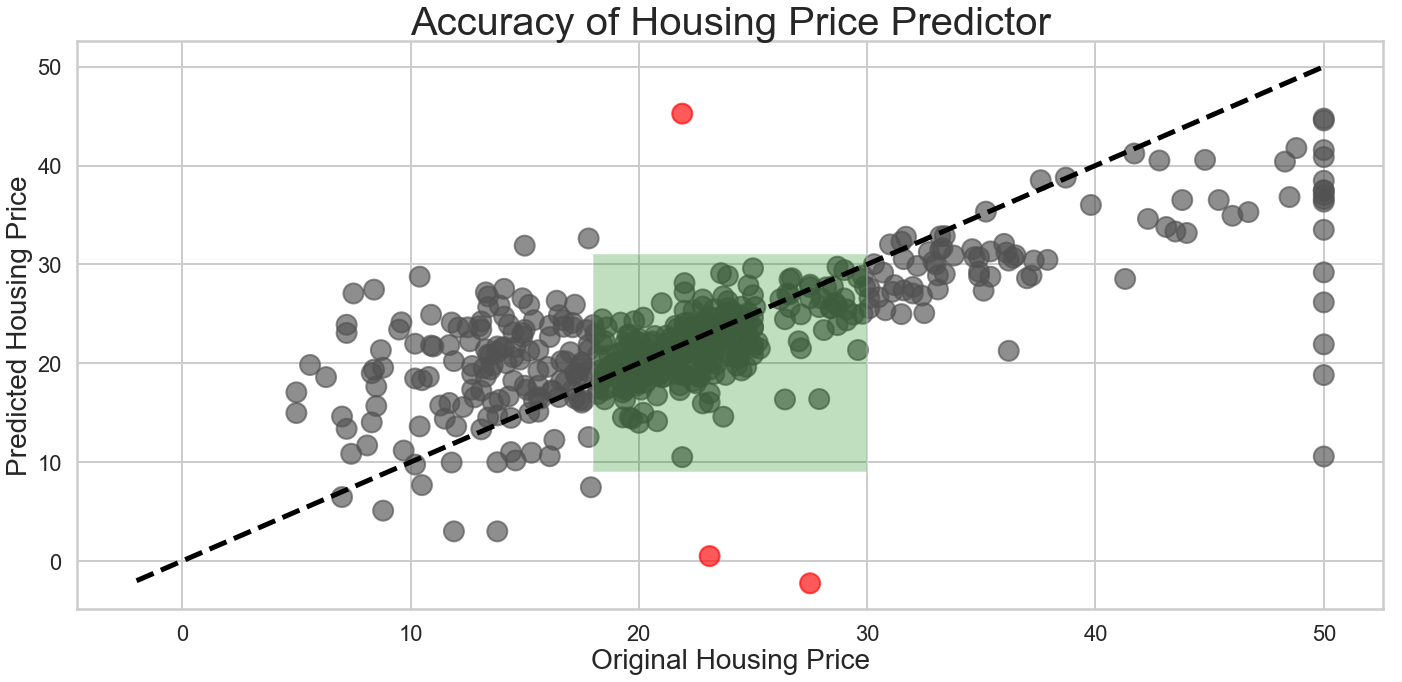

In [33]:
#Prediction versus accuracy model

# Setting Figure size
plt.figure(figsize=(20,10))
#Customizing colors of dots on scatter plot
col = np.where(m.fittedvalues<1,'r',np.where(m.fittedvalues>45,'r','#525252'))
#Scatter plot with custom colors
plt.scatter(bos.PRICE, m.fittedvalues, c=col, s= 400, alpha= .65)
#Shaded area to highlight good predictions
plt.fill_between([18,30], 9, 31, facecolor='g', alpha = .25, interpolate=True)
#Line of best predictions
plt.plot([-2, 50], [-2, 50], color = 'black', linewidth = 5, linestyle= "dashed")
plt.ylabel("Predicted Housing Price", fontsize=28)
plt.xlabel("Original Housing Price", fontsize=28)
plt.title("Accuracy of Housing Price Predictor", fontsize=40)
plt.tight_layout()

## Part 4: Fitting Linear Regression using `sklearn`
***

In [34]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

#Create a LinearRegression object
lm = LinearRegression() #use fit_intercept= false if you dont want a y-intercept
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions below:

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [35]:
# Look inside lm object
lm.normalize

def get_parameters_fit(model,X,y):
    model_params = pd.DataFrame({'Factors':['Intercept']+list(X.columns),'EstdCoefficients':[model.intercept_]+list(model.coef_)})
    
    R2 = model.score(X,y)
    return model_params,R2

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [36]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


#### Fitting a y-intercept
* Typically in the real world a model's intercept is not assumed to be going through the origin. If the multiple regression example above went through the origin, then it would mean the housing price is zero as well as all the other factors which is not the case. There can still be crime, PT-ratios, LSTATS, ect even if the housing price was to be zero. Thus, the line of best fit should not be going through the origin.

* Generally, we should take away the y-intercept if it is not significant. To do this, insert the "fit_intercept=False" argument when you create a linear regression object...  LinearRegression("fit_intercept=False") or by adding a -1 in the Statsmodels formula.

#### Residuals & i.i.d (independently and identically distributed)

*  Normally distributed data does not necessarily mean i.i.d data. One can think about this with simple logic. It is possible for the residuals to be perfectly normally distributed, but perhaps they had an effect on each other (meaning they weren't independently distributed).

* *If the residuals are non-normal, this could impact the precise p-values of the coefficients, however, if the distribution is not outrageously abnormal, the tests should still provide good approximations.*

#### Normal Distribution for Dependent Variable?

* The response variable does not need to have normal distribution. Remember, the goal is to predict the response variable based upon the predictor variable, and a random distribution of the response is perfectly fine given the sample size is large enough.

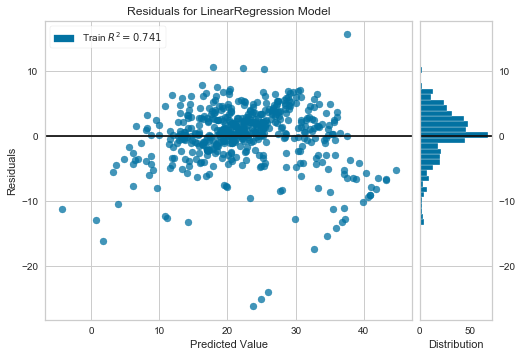

In [41]:
from yellowbrick.regressor import ResidualsPlot
residPlt = ResidualsPlot(lm)
residPlt.fit(X,bos.PRICE)
residPlt.poof()

*This plot looks good, it shows the residuals are randomly dispersed and almost normally distributed*

### TESTING: Comparing with or with-out a y-intercept 

**Winner**: The AIC and r-squared were much higher without the y-intercept in the training models

In [43]:
#With y-intercept
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        19:59:06   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [44]:
#Without y-intercept
#The r^2 just jumped up! This model leaves out the y-intercept which proves this is the best course of action for this problem!!
m = ols('PRICE ~ RM -1',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          3.74e-256
Time:                        19:59:09   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.0

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [45]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [46]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [47]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [48]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [49]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [ ]:
X2 = bos[["INDUS", "PTRATIO", "RM"]]

#### Histogram Insights
There are outliers with housing prices predicted near or below zero. This may of happened because they were labeled with zero bedrooms for a studio.
#### Scatterplot Insights
The highlighted yellow area shows a much bigger zone of accuracy than the first model. This model is probably much more accurate because this model was constructed based on all the variables and not just the room size. Outliers near or below zero are colored in red.

#### scikit or statsmodels?
I like statsmodels for the initial quick test and train of the data because it provides and easy way to generate summary statistics. However, I enjoy the ability of sci-kit learn to be able to create, test and train data.

(array([ 1.,  0.,  1.,  2.,  3.,  8.,  9.,  7., 20., 33., 38., 45., 66.,
        55., 48., 35., 32., 24., 24., 19., 14., 10.,  4.,  5.,  3.]),
 array([-4.28131071, -2.32313495, -0.36495918,  1.59321658,  3.55139235,
         5.50956811,  7.46774387,  9.42591964, 11.3840954 , 13.34227117,
        15.30044693, 17.25862269, 19.21679846, 21.17497422, 23.13314998,
        25.09132575, 27.04950151, 29.00767728, 30.96585304, 32.9240288 ,
        34.88220457, 36.84038033, 38.7985561 , 40.75673186, 42.71490762,
        44.67308339]),
 <a list of 25 Patch objects>)

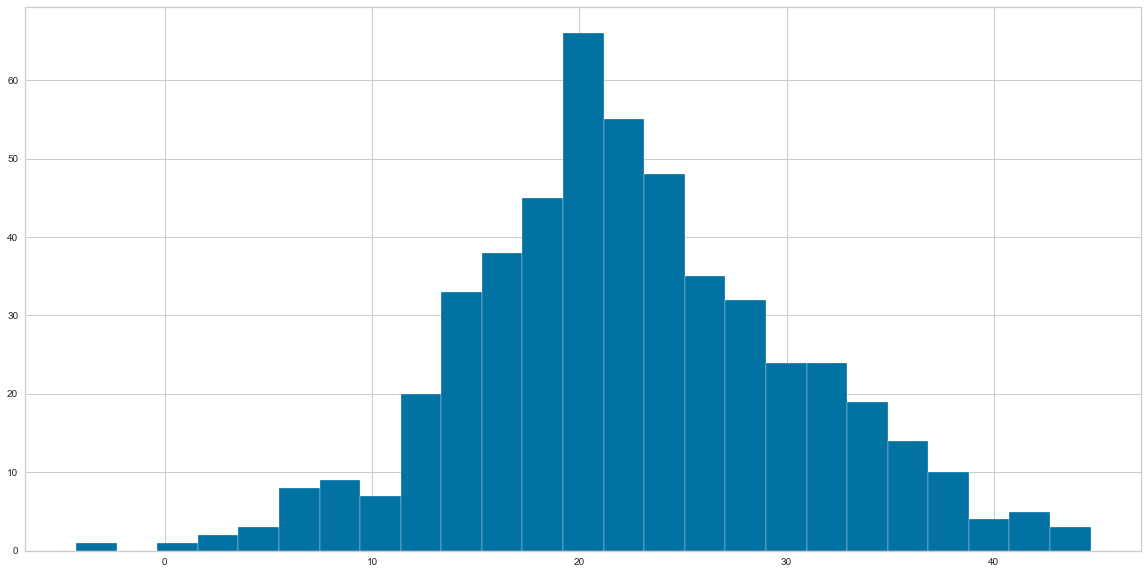

In [50]:
plt.figure(figsize=(20,10))
pred= lm.predict(X)
plt.hist(pred, bins= 25)

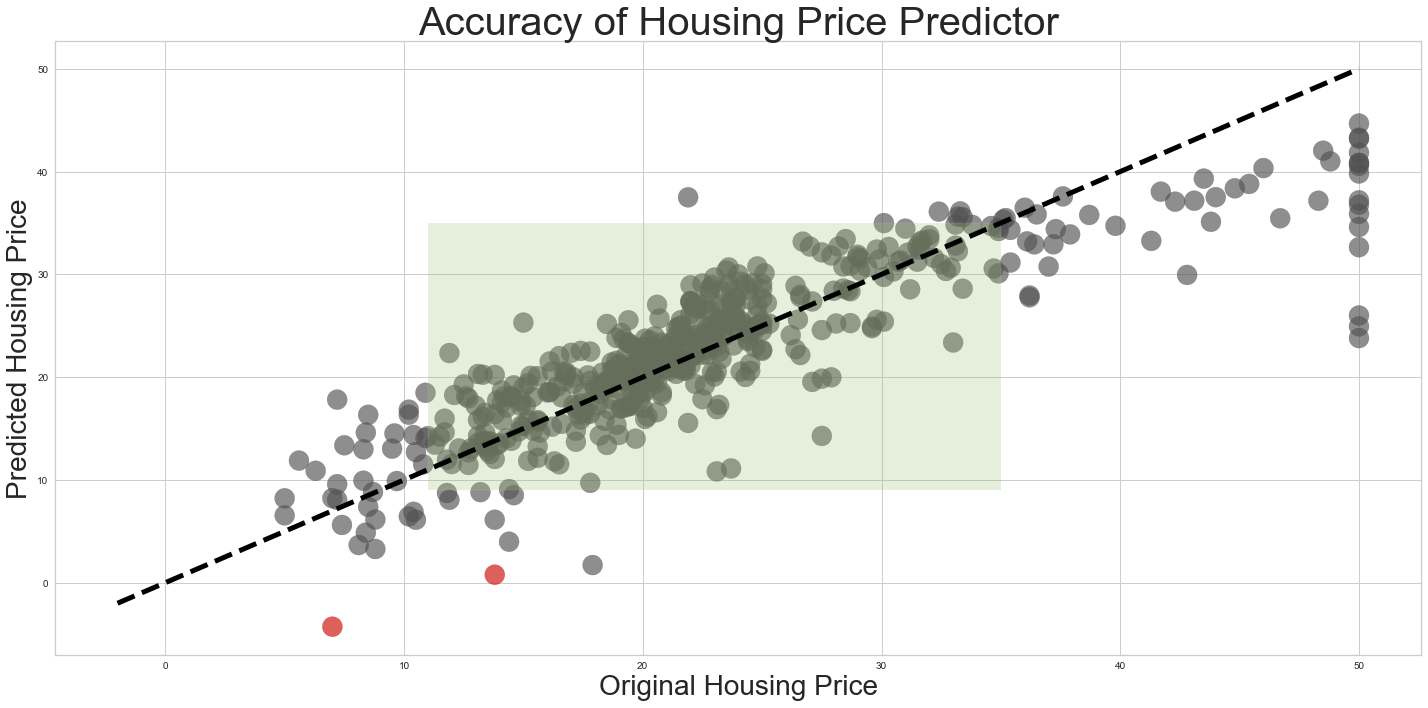

In [51]:
# Setting Figure size
plt.figure(figsize=(20,10))
#Customizing colors of dots on scatter plot
col = np.where(pred<1,'r',np.where(pred>45,'r','#525252'))
#Scatter plot with custom colors
plt.scatter(bos.PRICE, pred, c=col, s= 400, alpha= .65)
#Shaded area to highlight good predictions
plt.fill_between([11,35], 9, 35, facecolor='g', alpha = .25, interpolate=True)
#Line of best predictions
plt.plot([-2, 50], [-2, 50], color = 'black', linewidth = 5, linestyle= "dashed")
plt.ylabel("Predicted Housing Price", fontsize=28)
plt.xlabel("Original Housing Price", fontsize=28)
plt.title("Accuracy of Housing Price Predictor", fontsize=40)
plt.tight_layout()

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [55]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

ValueError: shapes (506,13) and (3,) not aligned: 13 (dim 1) != 3 (dim 0)

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [56]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2)

SyntaxError: unexpected EOF while parsing (<ipython-input-56-e9b4b23698b5>, line 1)

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

#### Interpretation of Intercept and Coefficient

The intercept for this relationship is 62.34, which means when the predicted price of a house is $0 it is actually 62k. The coefficent is -2.157 which means for every 1 unit increased in PTRATIO, the housing price will go down 2,157K.  meaning that for every one unit of increase in pupil-to-teacher ratio ('PTRATIO'), the housing price will drop by 2.16k.

#### R-squared

0.258, or 25.8% of the variance in housing price can be explained by a change in the PTRATIO. This is a small r-squared and this model would benefit from the use of other variables.

#### F-statistic

F-statistic = variance between groups / variance within groups

The F-statistic is 175.1 with a significance of 1.61e-34 which suggests the between-groups variance is 175x the within-group variance, and we can reject the null hypothesis because the p value is < 0.05.

#### Relationship between f-stat and t-stat

𝐹-stat on a single variable is equal to the square of the 𝑡-stat on its regression coefficient. Significance tests on either will yield identical 𝑝-values.The 𝑡-test is asking how many standard errors away from the null your test statistic is, the 𝐹.

best fit line:
y = 16.72 + 0.26x


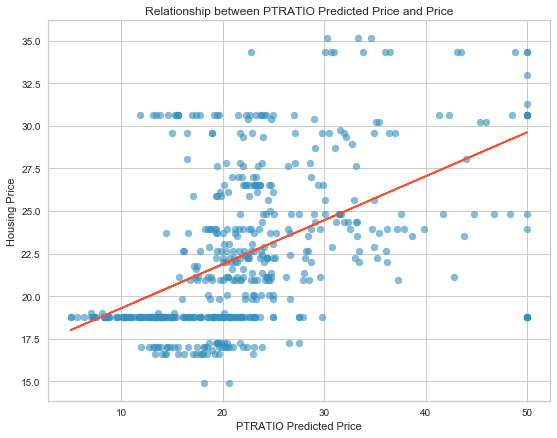

In [59]:
#scikit with PTRATIO
pt_rat = bos[["PTRATIO"]]
lm.fit(pt_rat, bos.PRICE)
pred_ptratio = lm.predict(pt_rat)
gen_scatter (bos.PRICE, pred_ptratio, "PTRATIO Predicted Price")

In [64]:
m = ols('PRICE ~ PTRATIO',bos).fit()
print("Results from the relationship with ptratio and price: ")
print(m.summary())

Results from the relationship with ptratio and price: 
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           1.61e-34
Time:                        20:09:07   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

#### Interpretation of the Coefficients

The number of bedrooms has the largest coefficient (7.3804) which means it is the largest indicator of housing price. It also means for every one unit of change in bedrooms the price increases by $7,380. Crime has the smallest coefficient (-0.2050) which means it has the least impact on the price on a home out of these three variables and for every one unit of increase in crime the price goes down by $205.

#### R-squared

The r-squared is 0.594. This indicates 59% of the variance in housing price can be explained by a change in these three variables. This is much better than the r-squared we got above with all 13 variables

#### F-statistic

F-statistic = variance between groups / variance within groups

The F-statistic is 245.2 with an even LOWER significance than above with 6.15e-98. This suggests the between-groups variance is 245.2x the within-group variance, and we can reject the null hypothesis because the p value is < 0.05.

best fit line:
y = 9.14 + 0.59x


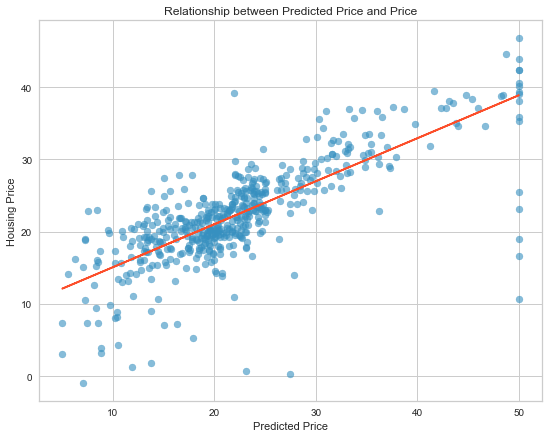

In [65]:
#scikit with crime, rooms, & PTRATIO
x2 = bos[["PTRATIO", "CRIM", "RM"]]
lm.fit(x2, bos.PRICE)
pred_x2 = lm.predict(x2)
gen_scatter (bos.PRICE, pred_x2, "Predicted Price")

In [66]:
m = ols('PRICE ~ PTRATIO + CRIM + RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 04 Aug 2019   Prob (F-statistic):           6.15e-98
Time:                        20:10:21   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

#### Adding non-collinear variables:
I tried adding INDUS & NOX and the model that only NOX was added performed the best overall. 

Interestingly, if you combine and use both INDUS & NOX, they are collinear and the AIC goes up slightly (you want this value to go down) that the NOX, best performing model.

In [71]:
#WINNER: Adding the nox variable
model = ols('PRICE ~ PTRATIO + CRIM + RM + NOX -1',bos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2154.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          1.99e-314
Time:                        20:24:22   Log-Likelihood:                -1599.5
No. Observations:                 506   AIC:                             3207.
Df Residuals:                     502   BIC:                             3224.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTRATIO       -0.9264      0.090    -10.239      0.0

In [67]:
#Adding the INDUS variable
m = ols('PRICE ~ PTRATIO + CRIM + RM + INDUS -1',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2106.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          4.59e-312
Time:                        20:13:35   Log-Likelihood:                -1605.0
No. Observations:                 506   AIC:                             3218.
Df Residuals:                     502   BIC:                             3235.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTRATIO       -0.9839      0.091    -10.791      0.0

In [69]:
# See how collinearity affects results with NOX & INDUS
m = ols('PRICE ~ PTRATIO + CRIM + RM + NOX + INDUS-1',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1721.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):          8.92e-313
Time:                        20:13:41   Log-Likelihood:                -1599.4
No. Observations:                 506   AIC:                             3209.
Df Residuals:                     501   BIC:                             3230.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTRATIO       -0.9183      0.092     -9.941      0.0


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
http://mpastell.com/2013/04/19/python_regression/

#### Fitted values versus residuals plot: 

The first plot below shows a nice randomly scattered residuals plot. If there had been structure shown then I would of needed to go back to the drawing board to see what was wrong. Majority of the points are clustered around 0 residual, and normally distributed, which is a good sign. However, the residuals plot also shows a some outliers. 

#### Quantile Plot: 

The quantile plot shows if your residuals are normally distributed (or following the set distribution. The plot deviates a little in the 3+- quartile which means the residual distribution is more light tailed.

#### Residual vs Quantile plot:

Residual vs fitted values plot is a good way to show the distribution of residuals across the spectrum of the data. This plot also gives a better look at how the error affect different values of homes as well as outliers.

Quantile plot is a good representation to conclude what distribution may the residuals fall. While the quantile plot doesn't show a magnitude of error, so you can't see exact location of outliers. 

#### Outliers: 
Outliers are shown above in both the plots, most outliers are on the right tail, or the higher valued homes. This suggests that the model is most error prone for houses valued the highest. 

#### Leverage and Influence plots:

The final leverage plots show that points with index 405, 418, and 380 have a high leverage with 414, and 410 having some leverage. Leverage is defined by its potential to influence the data (how far along is a point on the X axis). 405,418, and 380 have high leverage but exert less influence on the regression line, while outliers like 367, 365, 368, etc. have low leverage but have high influence on the regression. 

A common feature of these low leverage high influence outliers is the high actual price of the house. The regression model fails to valuate these high prices close to actuals, probably due to location factor, and have have high influence on the model output.

The high leverage low influence points - 405, 418, and 380 - are away from the X axis, but not far along the Y axis. The model correctly predicts the price of these points, but they influence the regression line. 

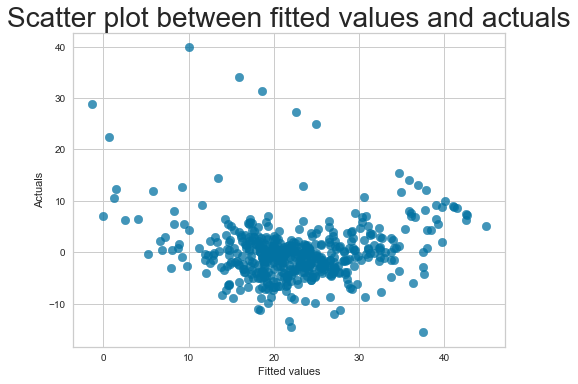

In [77]:
plt.scatter(x=model.fittedvalues,y=model.resid, s=75, alpha=.75)
plt.xlabel('Fitted values')
plt.ylabel('Actuals')
plt.title('Scatter plot between fitted values and actuals', fontsize=28)
plt.tight_layout()


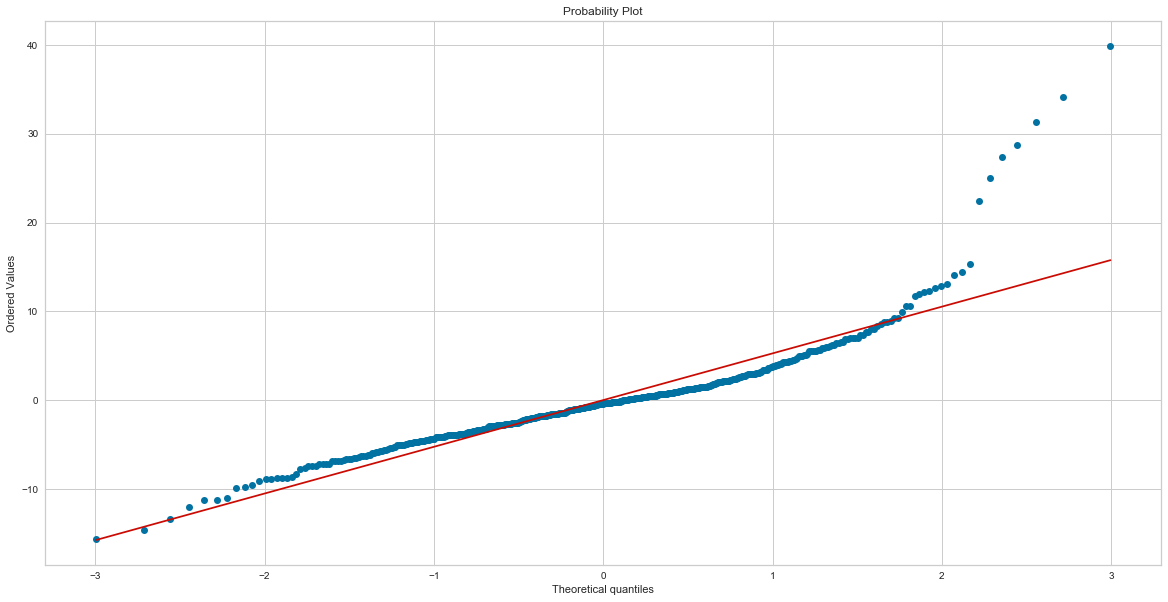

In [78]:
from scipy import stats
plt.figure(figsize=(20,10))
Quant= stats.probplot(model.resid, plot=sns.mpl.pyplot)

<StemContainer object of 3 artists>

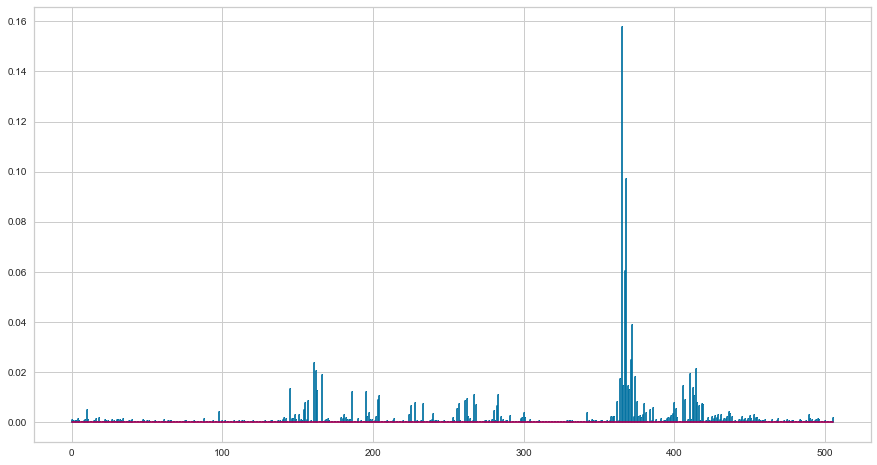

In [79]:
#Cooks distance
influence = model.get_influence()
#c is the distance and p is p-value
plt.figure(figsize=(15,8))
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

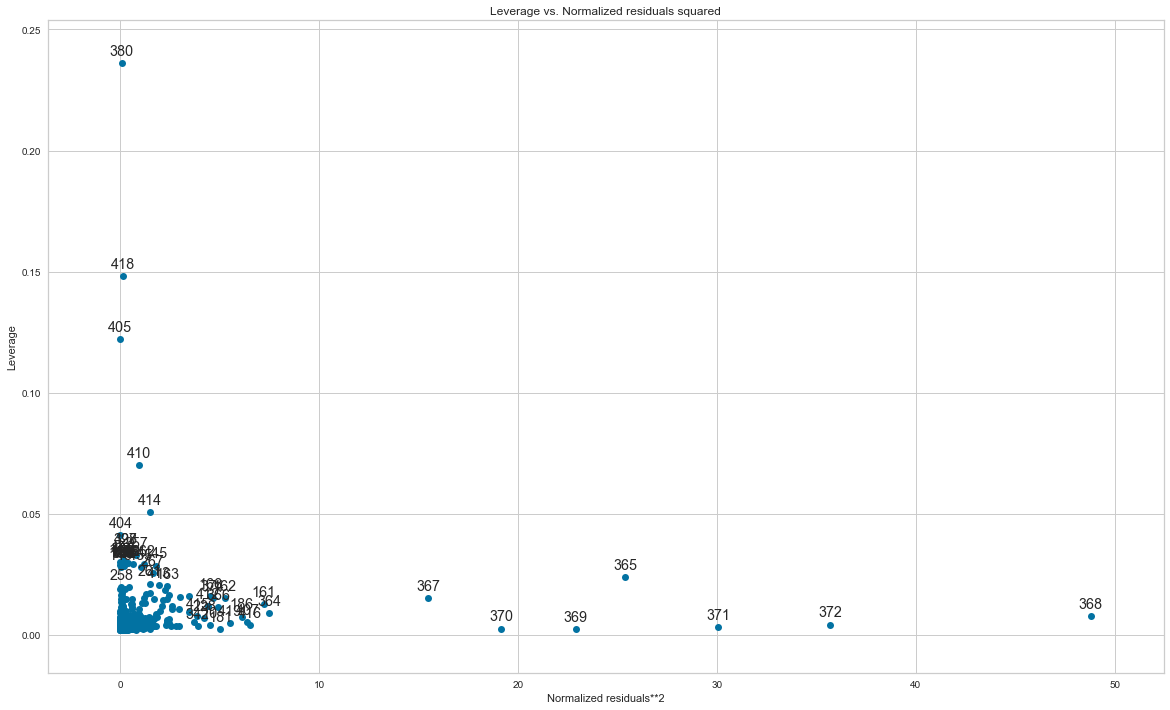

In [80]:
from statsmodels.graphics.regressionplots import *
rcParams['figure.figsize'] = 20, 12
f= plot_leverage_resid2(model, alpha= .05)

<Figure size 2160x1080 with 0 Axes>

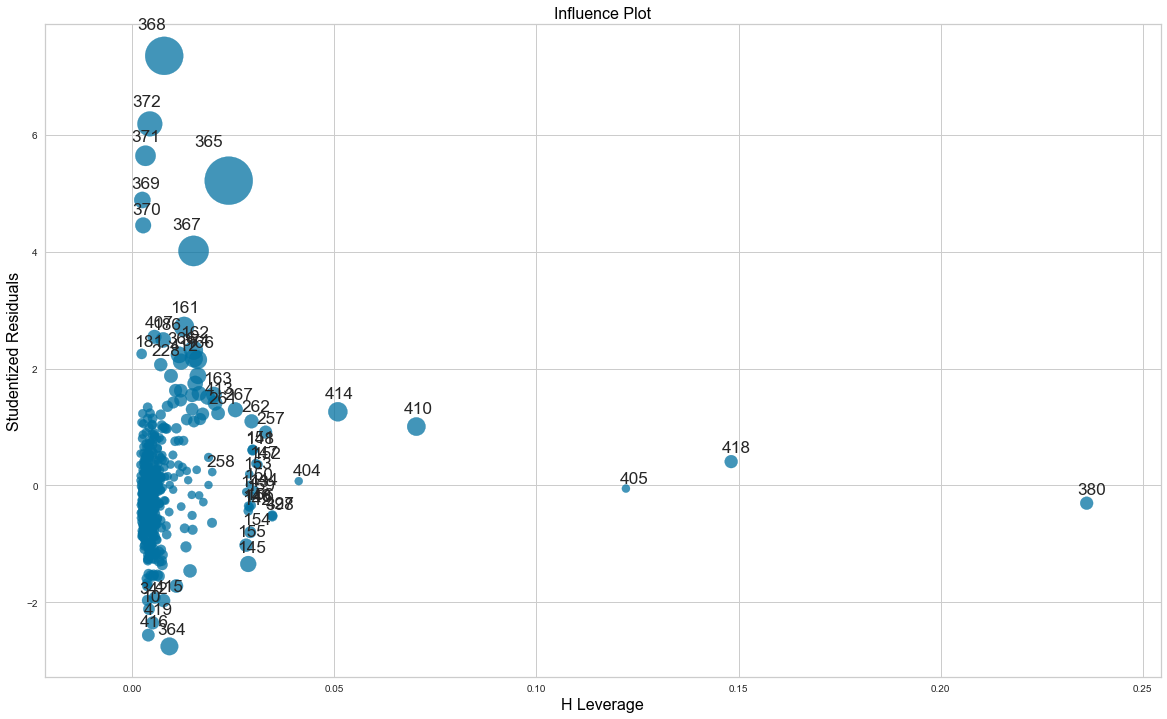

In [85]:
plt.figure(figsize=(30,15))
rcParams['figure.figsize'] = 20, 12
f2= influence_plot(model)

### Tackling the Outliers

In [86]:
#Outliers to be removed:

outliers_removed = [364,367,370,369,365,371,372,368,414,410,405,418,380]

remve_outliers = bos.drop(outliers_removed,axis=0)
remve_outliers.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,2.930976,11.663286,10.953164,0.062880,0.551894,6.296505,67.854564,3.856708,9.168357,401.440162,18.409533,358.803793,12.658114,22.379108
std,5.812478,23.554344,6.855150,0.242994,0.115934,0.672936,28.146478,2.097974,8.494502,165.388711,2.174466,88.326397,7.069933,8.784435
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079780,0.000000,5.130000,0.000000,0.448000,5.889000,43.400000,2.124700,4.000000,277.000000,17.000000,376.570000,7.010000,17.100000
50%,0.239120,0.000000,8.560000,0.000000,0.532000,6.209000,76.500000,3.317500,5.000000,330.000000,18.900000,391.830000,11.410000,21.200000
75%,2.733970,17.500000,18.100000,0.000000,0.624000,6.619000,93.600000,5.231100,8.000000,666.000000,20.200000,396.280000,16.940000,25.000000
max,41.529200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [87]:
best_model = ols('PRICE ~ PTRATIO + CRIM + RM + NOX -1',remve_outliers).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     3586.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:27:43   Log-Likelihood:                -1426.0
No. Observations:                 493   AIC:                             2860.
Df Residuals:                     489   BIC:                             2877.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PTRATIO       -1.0553      0.070    -15.000      0.000      -1.194      -0.917
CRIM          -0.1954      0.041     -4.801      0.000      -0.275      -0.115
RM             7.8451      0.190     41.292      0.000       7.472       8.218
NOX          -12.7222      1.813     -7.019      0.000     -16.284      -9.161
==============================================================================
Omnibus:                       33.654   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.809
Skew:                           0.490   Prob(JB):                     3.41e-12
Kurtosis:                       4.269   Cond. No.                         182.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***No surprise here, but not including the outliers resulted in better performing model!***